In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

print(pd.__version__)

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')

# Convert dataset to pandas DataFrame
df = dataset['train'].to_pandas()

# Data Clean Up
# Change string to datetime ('job_posted_date' column)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert 'job_skills' string list to a python list
import ast
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


2.2.3


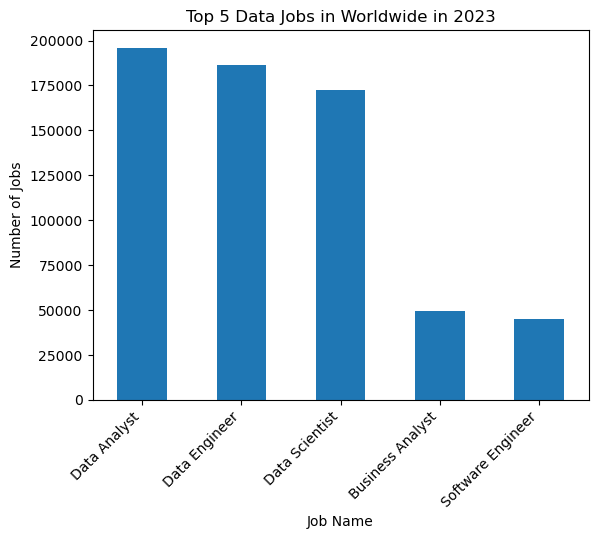

In [18]:
fig, ax =plt.subplots()
df['job_title_short'].value_counts().head(5).plot(kind='bar', ax=ax)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Name')
plt.ylabel('Number of Jobs')
plt.title('Top 5 Data Jobs in Worldwide in 2023')
plt.show()


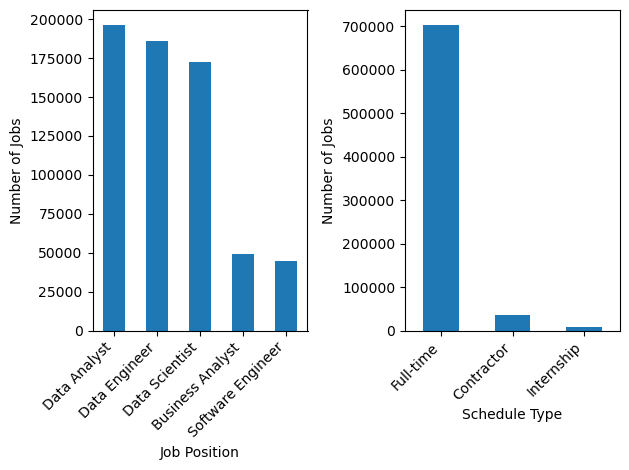

In [50]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().head(5).plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('Job Position')
ax[0].set_ylabel('Number of Jobs')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('Schedule Type')
ax[1].set_ylabel('Number of Jobs')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()


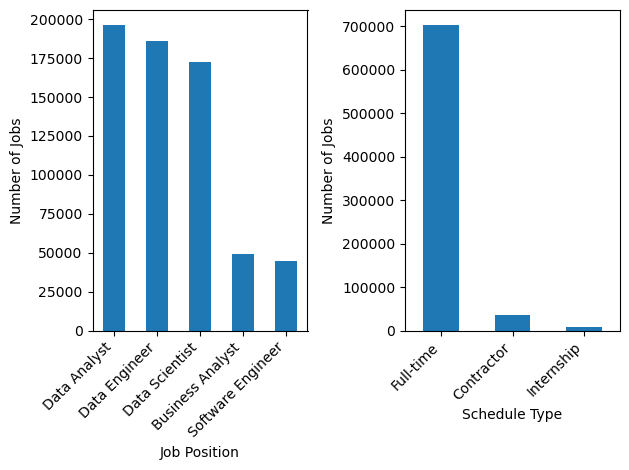

In [51]:
fig

In [ ]:
ax[0], ax[1]
#fig is an entire figure,
#ax is indexed for each subplot

(<Axes: xlabel='job_title_short'>, <Axes: xlabel='job_schedule_type'>)

In [52]:
df_skills = df.copy()

In [55]:
df_skills.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [57]:
df_skills_exploded = df_skills.explode('job_skills')

In [60]:
top_jobs = df['job_title_short'].value_counts().head(3).index.to_list()

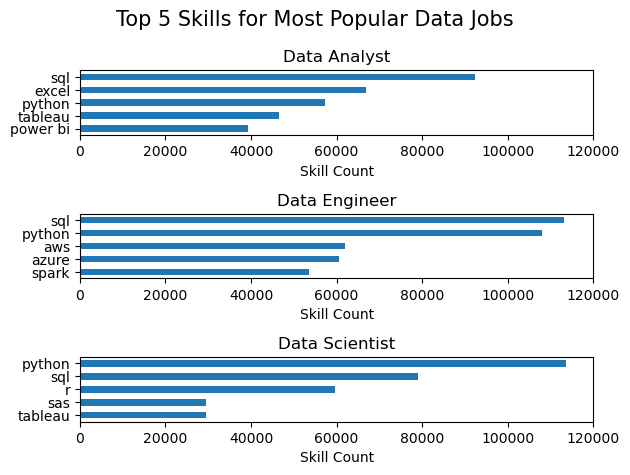

In [87]:
fig, ax = plt.subplots(3,1)
figsize = (30, 50)

for i, job in enumerate(top_jobs):
    df_skills_filtered = df_skills_exploded[df_skills_exploded['job_title_short'] == job]
    df_skills_filtered['job_skills'].value_counts().head(5).plot(kind='barh', ax=ax[i])
    ax[i].set_title(job)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Skill Count')
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 120000)

fig.suptitle('Top 5 Skills for Most Popular Data Jobs', fontsize=15)
fig.tight_layout()
plt.show()



